## Import libs

In [3]:
import numpy as np
import matplotlib as mpl
import csv
#mpl.rcParams['mathtext.fontset'] = 'cm'
#mpl.rc('font', family='serif')

import matplotlib.pyplot as plt
import matplotlib.image as img 
from matplotlib import ticker, cm

import matplotlib.patches as patches
from matplotlib.ticker import MaxNLocator

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

import sys, code, os
import math
import random

from scipy import stats
from scipy import interpolate 
from scipy.optimize import curve_fit

from array import array

import pickle

import time

## functions

## file paths

In [2]:
mypath = "/Users/shaoleili/Downloads/APD_data"
mygraphpath = "/Users/shaoleili/Downloads/mweber_constrainer_images"

## load data

In [13]:
critic = []
with open(mypath + '/critic_loss_constrain_95.csv', mode='r') as csv_file:
    spamreader = csv.reader(csv_file, delimiter=' ', quotechar='|')
    for row in spamreader:
        critic.append(row[0].split(','))
while ['loss', 'wasserstein1', 'wasserstein2', 'gradient_penalty'] in critic:
    critic.remove(['loss', 'wasserstein1', 'wasserstein2', 'gradient_penalty'])

95


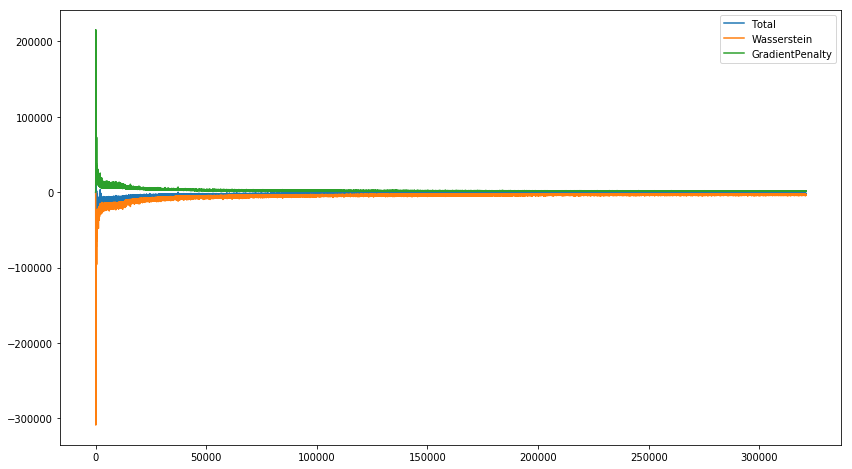

In [17]:
plt.figure(figsize=(14,8))
d = np.array(critic[:],dtype=float)
titlename = critic[0]
epoch = int(d.shape[0] / 3380)
print(epoch)
plt.plot(d[:,0],label = r'Total')
plt.plot(d[:,1]+d[:,2],label = r'Wasserstein')
plt.plot(d[:,3],label = r'GradientPenalty')
plt.legend()
plt.show()

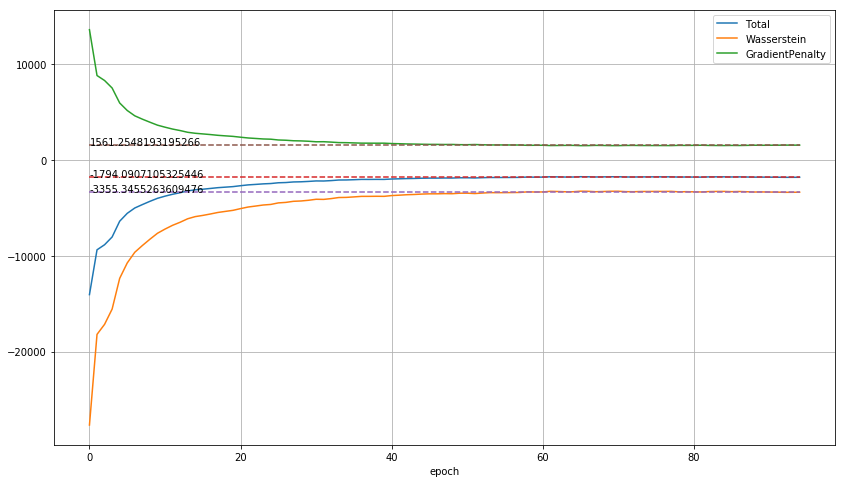

In [30]:
d_epoch = d.reshape(epoch,3380,4)
d_epoch = np.array([[np.mean(i[:,j]) for j in range(4)] for i in d_epoch])
plt.figure(figsize=(14,8))
plt.plot(d_epoch[:,0],label = r'Total')
plt.plot(d_epoch[:,1]+d_epoch[:,2],label = r'Wasserstein')
plt.plot(d_epoch[:,3],label = r'GradientPenalty')
plt.plot(np.full(d_epoch[:,0].shape,d_epoch[:,0][-1]),'--')
txt = str(d_epoch[:,0][-1])
plt.annotate(txt, (0, d_epoch[:,0][-1]))
plt.plot(np.full(d_epoch[:,1].shape,d_epoch[:,1][-1]+d_epoch[:,2][-1]),'--')
txt = str(d_epoch[:,1][-1]+d_epoch[:,2][-1])
plt.annotate(txt, (0, d_epoch[:,1][-1]+d_epoch[:,2][-1]))
plt.plot(np.full(d_epoch[:,3].shape,d_epoch[:,3][-1]),'--')
txt = str(d_epoch[:,3][-1])
plt.annotate(txt, (0, d_epoch[:,3][-1]))
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.savefig(mygraphpath + '/discriminator_epoch_loss_'+str(epoch)+'.png',dpi = 300)

In [4]:
con_p,con_e = [],[]
with open(mypath + '/constrainer_p_loss_constrain_95.csv', mode='r') as csv_file:
    spamreader = csv.reader(csv_file, delimiter=' ', quotechar='|')
    for row in spamreader:
        con_p.append(row[0].split(','))
with open(mypath + '/constrainer_e_loss_constrain_95.csv', mode='r') as csv_file:
    spamreader = csv.reader(csv_file, delimiter=' ', quotechar='|')
    for row in spamreader:
        con_e.append(row[0].split(','))
while ['loss'] in con_p:
    con_p.remove(['loss'])
while ['loss'] in con_e:
    con_e.remove(['loss'])

In [25]:
epoch = 95
plt.figure(figsize=(14,8))
c_e,c_p = np.array(con_e[:],dtype=float),np.array(con_p[:],dtype=float)
c_e,c_p = c_e.reshape(epoch,int(len(con_e) / epoch)),c_p.reshape(epoch,int(len(con_p) / epoch))
c_e,c_p = np.array([np.mean(i) for i in c_e]),np.array([np.mean(i) for i in c_p])

<Figure size 1008x576 with 0 Axes>

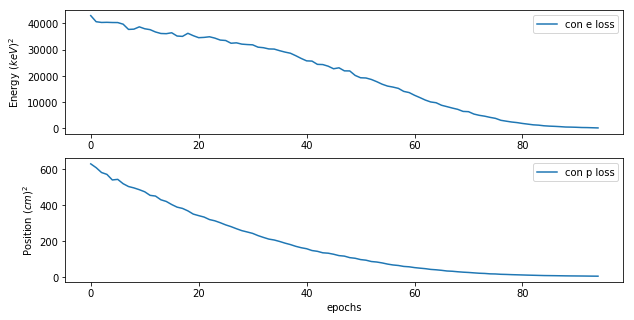

In [29]:
plt.subplot(2,1,1)
plt.plot(c_e,label = 'con e loss')
plt.legend()
#plt.yscale('log')
plt.ylabel(r'Energy $(keV)^{2}$')
plt.subplot(2,1,2)
plt.plot(c_p,label = 'con p loss')
plt.legend()
#plt.yscale('log')
plt.ylabel(r'Position $(cm)^{2}$')
plt.xlabel('epochs')
plt.savefig(mygraphpath + '/constrainer_loss_'+str(epoch)+'.png',dpi = 300)